<a href="https://colab.research.google.com/github/theindianwriter/cs6910_assignment1/blob/forward_backward_prop/DL_Assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
from keras.datasets import fashion_mnist

In [19]:
def data_loader():
  (x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
  num_of_train_data = x_train.shape[0]
  combined_training_data = list(zip(x_train,y_train))
  np.random.shuffle(combined_training_data)
  (x_train,y_train) = zip(*combined_training_data)
  x_train,y_train = np.array(x_train),np.array(y_train)
  validation_size = int(0.1*num_of_train_data)
  x_validation = x_train[:validation_size]
  y_validation = y_train[:validation_size]
  x_train = x_train[validation_size:]
  y_train = y_train[validation_size:]
  return x_train,y_train,x_validation,y_validation,x_test,y_test


In [20]:
x_train,y_train,x_validation,y_validation,x_test,y_test = data_loader()
print("information regarding the training,validation and test dataset")
print("the size of training dataset is {},validation set is {},test set is {}".format(x_train.shape[0],x_validation.shape[0],x_test.shape[0]))

information regarding the training,validation and test dataset
the size of training dataset is 54000,validation set is 6000,test set is 10000


In [23]:
def vectorize(y):
  y_vectorize = np.zeros((10,1))
  y_vectorize [y] = 1
  return y_vectorize

In [25]:
def prep_data(X,Y):
  X_norm = X.astype('float32')/255.0
  X_norm_vector = np.array([np.reshape(x,(784,1)) for x in X_norm])
  Y_vectorize = np.array([vectorize(y) for y in Y])
  return X_norm_vector,Y_vectorize

In [15]:
class_label = ['T-shirt/top', 
           'Trousers', 
           'Pullover', 
           'Dress', 'Coat', 
           'Sandal', 
           'Shirt', 
           'Sneaker', 
           'Bag', 
           'Ankle boot']

In [22]:
#Q1 plots one image of each class 

def plot_each_label(X,Y):
  rows = 2
  cols = 5
  fig = plt.figure()
  ax = []
  j = 0
  for i in range(1,rows*cols + 1):
    ax.append(fig.add_subplot(rows,cols,i))
    pos = np.where(Y == j)
    plt.imshow(X[pos[0][0]])
    plt.xticks([])
    plt.yticks([])
    ax[-1].set_title(class_label[j])
    j += 1
  plt.show()


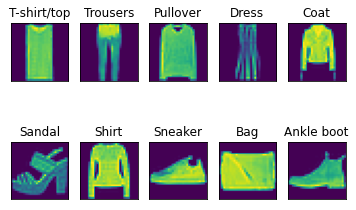

In [21]:
#Q1 calls and plots image of each class
plot_each_label(x_train,y_train)

In [27]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

  

In [76]:
class Network:
  #initialization of the network
  def __init__(self,layers,weight_initilizer = "random"):
    
    self.num_of_layers = len(layers)

    if weight_initilizer == 'random':
      self.random(layers)
    elif weight_initilizer == 'Xavier':
      self.Xavier(layers)
    else:
      print("ERROR")

  def random(self,layers):
    self.biases = [np.random.randn(x,1) for x in layers[1:]]
    self.weights = [np.random.randn(x,y)/np.sqrt(y) for x,y in zip(layers[1:],layers[:-1])]

  def Xavier(self,layers):
    self.biases = []
    self.weights = []
    print("IMPLEMENTATION OF XAVIER")


  def calculate_loss(self,X,Y):
    if self.loss == "cross_entropy_loss":
      N = X.shape[0]
      error = 0.0
      for x,y in zip(X,Y):
        a,h = self.forward_propagation(x)
        y_estimated = h[-1]
        y_class = np.argmax(y)
        y_estimated[y_class] =  0.0000000001 if int(y_estimated[y_class]) == 0 else y_estimated[y_class]
        error += -np.log(y_estimated[y_class])
    return error/N


  def show_network(self):
    print(self.biases)
    print(self.weights)

  def perform_activation(self,a):
 
    if self.activation == 'sigmoid':
      h = sigmoid(a)
    else:
      print("ERROR")

    return h

  def perform_output_function(self,a):

    if self.output_function == "softmax":
      h = softmax(a)
    else:
      print("ERROR")

    return h


  def update_parameter(self,grad_wrt_weights,grad_wrt_biases,eta):
    if self.optimizer == "sgd":
      self.weights = [w - eta*gw for w,gw in zip(self.weights,grad_wrt_weights)]
      self.biases = [b - eta*gb for b,gb in zip(self.biases,grad_wrt_biases)]

  def forward_propagation(self,x):
    #input vector to the network
    a_i = x
    #array to store pre-activation vectors of the hidden layers and output layer
    a = []
    #array to store post activation vectors of the input layer,hidden layers and ouput layer
    h = [x]
    #calulating the pre-activation and post-activation vectors in the hidden layers
    for w,b in zip(self.weights[:-1],self.biases[:-1]):
      a_i = np.dot(w,a_i) + b
      a.append(a_i)
      h_i = self.perform_activation(a_i)
      h.append(h_i)

    #calculating the pre-activation and post-activation vector in the output layer
    w,b = self.weights[-1],self.biases[-1]
    a_o = np.dot(w,a[-1]) + b
    a.append(a_o)
    h_o = self.perform_output_function(a_o)
    h.append(h_o)
    return a,h


  def get_delta_last_layer(self,a,h,y):

    if self.output_function == "softmax":
      delta = h - y
      return delta
    else: 
      print("ERROR")

  def backward_propagation(self,x,y,a,h):
      
    grad_wrt_weights = [np.zeros(w.shape) for w in self.weights]
    grad_wrt_biases = [np.zeros(b.shape) for b in self.biases]

    delta = self.get_delta_last_layer(a[-1],h[-1],y)
    grad_wrt_biases[-1] = delta
    grad_wrt_weights[-1] = np.dot(delta,h[-2].T)
      
    for l in range(2,self.num_of_layers):
      delta = np.dot(grad_wrt_weights[-l+1].T,delta)*sigmoid_derivative(a[-l])
      grad_wrt_biases[-l] = delta
      grad_wrt_weights[-l] = np.dot(delta,h[-l-1].T)
    return grad_wrt_weights,grad_wrt_biases

  def fit(self,x_train,y_train,epochs = 5, eta = 0.001,batch_size = 64):
      
    N = x_train.shape[0]
    for epoch in range(epochs):

      error = self.calculate_loss(x_train,y_train)
      print("In epoch {} the loss is {}".format(epoch,error))
      combined_training_data = list(zip(x_train,y_train))
      np.random.shuffle(combined_training_data)
      x_train[:],y_train[:] = zip(*combined_training_data)
      x_train,y_train = np.array(x_train),np.array(y_train)

      mini_x_batches = [x_train[i:i+batch_size] for i in range(0,N,batch_size)]
      mini_y_batches = [y_train[i:i+batch_size] for i in range(0,N,batch_size)] 

      for mini_x_batch,mini_y_batch in zip(mini_x_batches,mini_y_batches):
        grad_wrt_weights = [np.zeros(w.shape) for w in self.weights]
        grad_wrt_biases = [np.zeros(b.shape) for b in self.biases]
        for x,y in zip(mini_x_batch,mini_y_batch):
              #forward propagation
          a,h = self.forward_propagation(x)
              #backward_propagation
          grad_del_wrt_weights,grad_del_wrt_biases = self.backward_propagation(x,y,a,h)

          grad_wrt_weights = [gw + dgw for gw,dgw in zip(grad_wrt_weights,grad_del_wrt_weights)]
          grad_wrt_biases = [gb + dgb for gb,dgb in zip(grad_wrt_biases,grad_del_wrt_biases)]

          #gradient descent variant
        self.update_parameter(grad_wrt_weights,grad_wrt_biases,eta/batch_size)
      


  def compile(self,optimizer = "sgd",loss = "squared-error",activation = "sigmoid",output_function = "softmax",metrics = "accuracy"):

    self.activation = activation
    self.output_function = output_function
    self.optimizer = optimizer
    self.loss = loss
    self.metrics = metrics


  def test(self,x_test,y_test):
    if self.metrics == "accuracy":
      N = x_test.shape[0]
      count = 0
      for x,y in zip(x_test,y_test):
        a,h = self.forward_propagation(x)
        y_estimated = h[-1]
        if np.argmax(y_estimated) == np.argmax(y):
          count += 1
      print("the accuracy is ",(count/N)*100)




In [28]:
x_train_transformed,y_train_transformed = prep_data(x_train,y_train)

In [77]:
net = Network([784,30,10],weight_initilizer="random")
net.compile(optimizer = "sgd",loss = "cross_entropy_loss",activation = "sigmoid",output_function = "softmax",metrics = "accuracy")


In [80]:
net.fit(x_train_transformed,y_train_transformed,epochs = 30, eta = 3,batch_size = 10)

In epoch 0 the loss is [23.02585093]
In epoch 1 the loss is [23.02116048]
In epoch 2 the loss is [23.02201329]
In epoch 3 the loss is [23.02073407]
In epoch 4 the loss is [23.02585093]
In epoch 5 the loss is [23.01945486]
In epoch 6 the loss is [23.02585093]
In epoch 7 the loss is [23.02585093]
In epoch 8 the loss is [23.01689643]
In epoch 9 the loss is [23.02585093]
In epoch 10 the loss is [23.02585093]
In epoch 11 the loss is [23.01647003]
In epoch 12 the loss is [23.02585093]
In epoch 13 the loss is [23.02585093]
In epoch 14 the loss is [23.02585093]
In epoch 15 the loss is [23.0139116]
In epoch 16 the loss is [23.02585093]
In epoch 17 the loss is [23.02585093]
In epoch 18 the loss is [23.02585093]
In epoch 19 the loss is [23.02585093]
In epoch 20 the loss is [23.02585093]
In epoch 21 the loss is [23.02585093]
In epoch 22 the loss is [23.02585093]
In epoch 23 the loss is [23.02585093]
In epoch 24 the loss is [23.02585093]
In epoch 25 the loss is [23.02585093]
In epoch 26 the loss is

In [61]:
x_test_transformed,y_test_transformed = prep_data(x_test,y_test)

In [79]:
net.test(x_test_transformed,y_test_transformed)

the accuracy is  19.950000000000003
